In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Sparkling.csv')

In [3]:
df1=pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'])

In [4]:
df1.head()

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


In [5]:
df1=pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [6]:
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [7]:
df1.shape

(187, 1)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [9]:
df1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


<AxesSubplot:xlabel='Sparkling', ylabel='Count'>

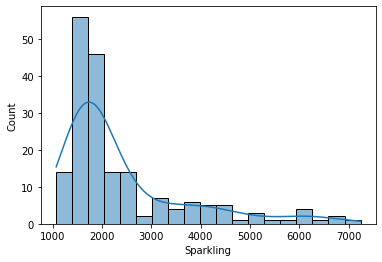

In [10]:
sns.histplot(df1.Sparkling,kde=True)

In [11]:
df1.duplicated().sum()

11

C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sparkling'>

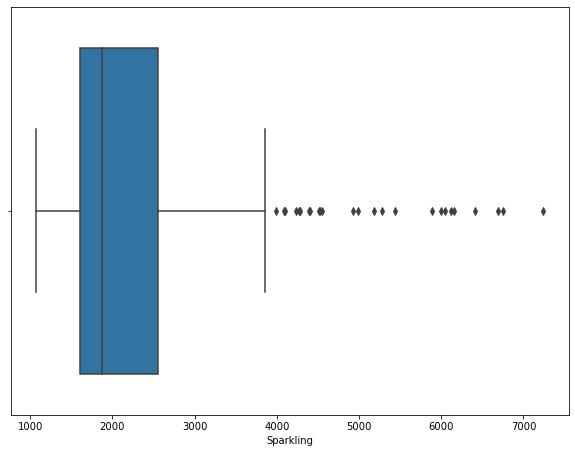

In [12]:
plt.figure(figsize=(10,7.5))
sns.boxplot(df1['Sparkling'])

In [13]:
df1['Sparkling'].unique()

array([1686, 1591, 2304, 1712, 1471, 1377, 1966, 2453, 1984, 2596, 4087,
       5179, 1530, 1523, 1633, 1976, 1170, 1480, 1781, 2472, 1981, 2273,
       3857, 4551, 1510, 1329, 1518, 1790, 1537, 1449, 1954, 1897, 1706,
       2514, 3593, 4524, 1609, 1638, 2030, 1375, 1320, 1245, 1600, 2298,
       2191, 2511, 3440, 4923, 1435, 2061, 1789, 1567, 1404, 1597, 3159,
       1759, 2504, 4273, 5274, 1771, 1682, 1846, 1589, 1896, 1379, 1645,
       2512, 3727, 4388, 5434, 1606, 1577, 1605, 1765, 1403, 2584, 3318,
       1562, 2349, 3987, 5891, 1389, 1442, 1548, 1935, 1250, 1847, 1930,
       2638, 3114, 4405, 7242, 1853, 1779, 2108, 2336, 1728, 1661, 2230,
       2421, 3740, 4988, 6757, 1757, 1394, 1982, 1650, 1654, 1406, 1971,
       1968, 2608, 3845, 4514, 6694, 1720, 1321, 1859, 1628, 1615, 1457,
       1899, 2424, 3116, 4286, 6047, 1902, 2049, 1874, 1279, 1432, 1540,
       2214, 1857, 2408, 3252, 3627, 6153, 1667, 1993, 1997, 1783, 1625,
       2076, 1773, 2377, 3088, 4096, 6119, 1494, 15

C:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sparkling', ylabel='Density'>

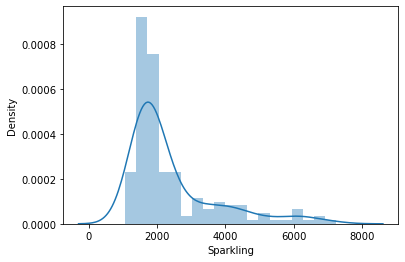

In [14]:
sns.distplot(df1['Sparkling'])

In [15]:
df1.skew()

Sparkling    1.817612
dtype: float64

In [16]:
df1.kurtosis()

Sparkling    2.709292
dtype: float64

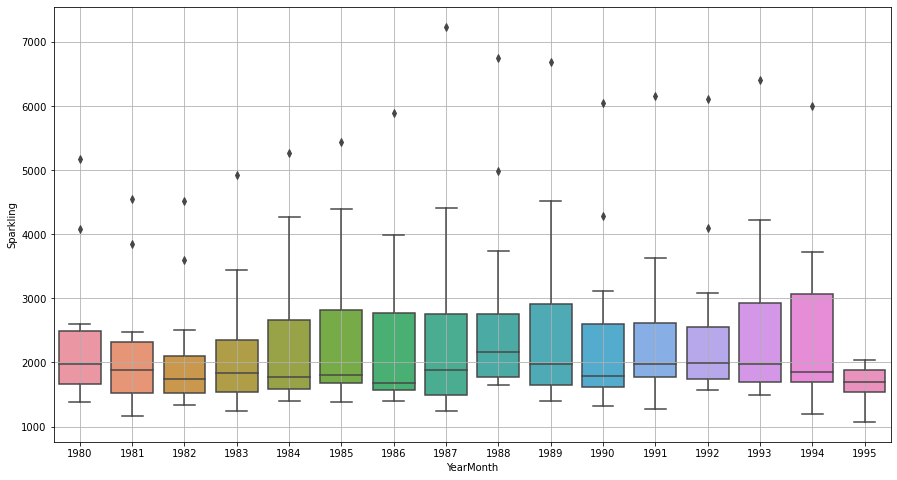

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df1.index.year,y = df1['Sparkling'])
plt.grid();

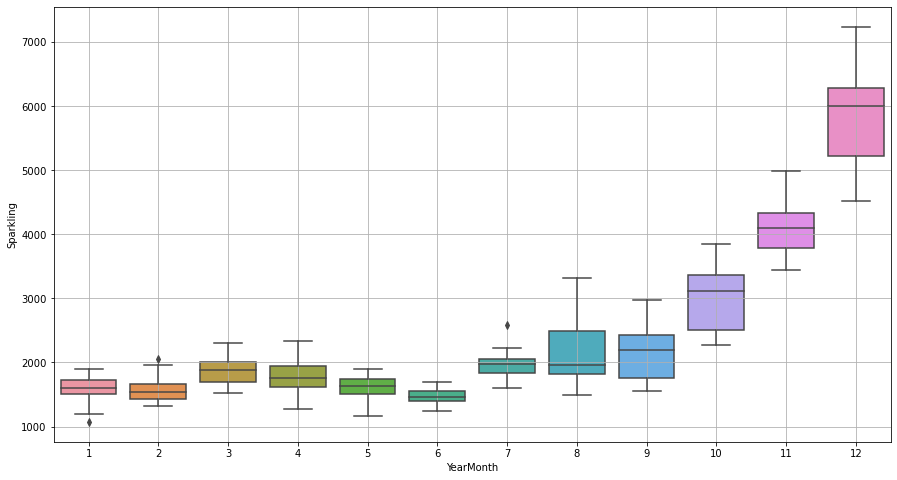

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df1.index.month,y = df1['Sparkling'])
plt.grid();

<AxesSubplot:xlabel='YearMonth'>

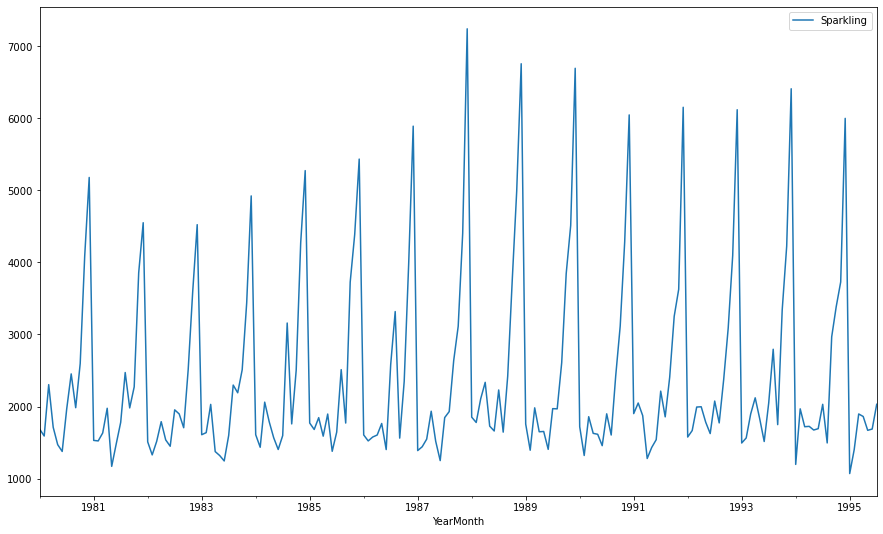

In [19]:
df1.plot(figsize=(15,9))

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
df1_add_decompose=seasonal_decompose(df1,model='additive')

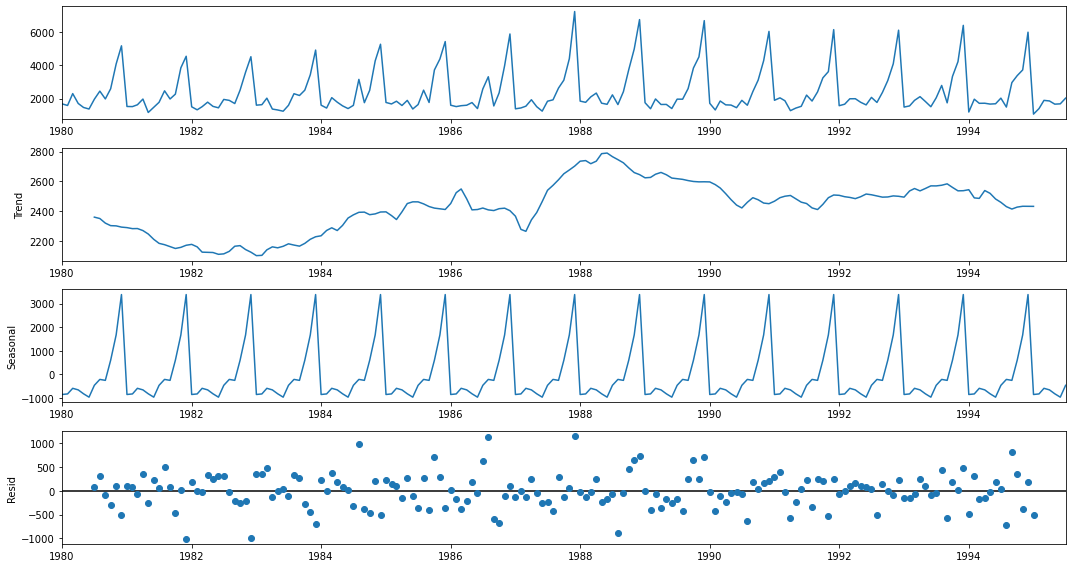

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df1_add_decompose.plot()
plt.show()

In [23]:
df1_mul_decompose=seasonal_decompose(df1,model='multiplicative')

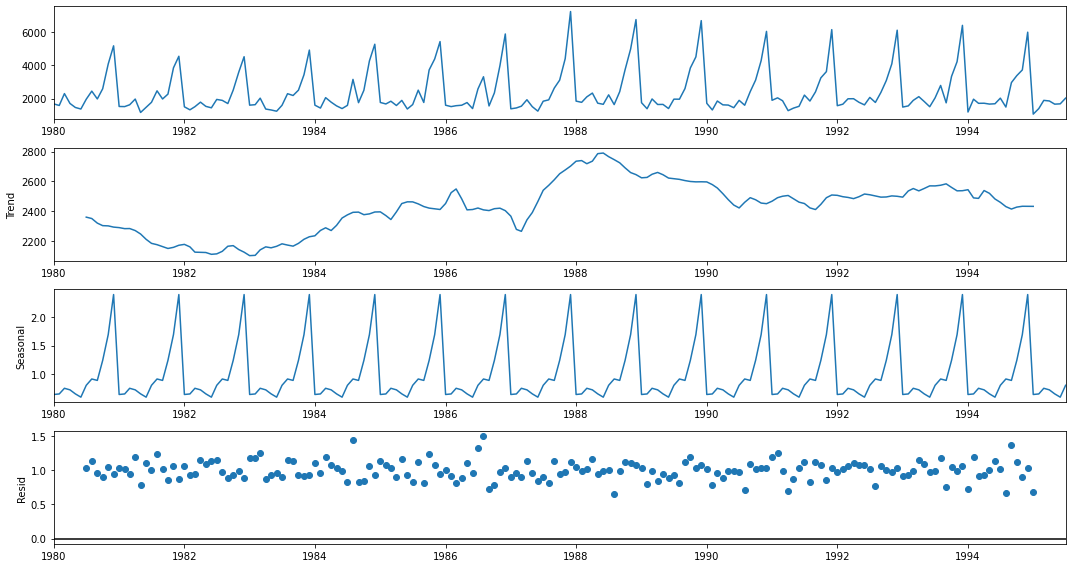

In [24]:
df1_mul_decompose.plot()
plt.show()

In [25]:
df1_add_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [26]:
df1_add_decompose.seasonal

YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
                 ...    
1995-03-01   -592.356630
1995-04-01   -658.490559
1995-05-01   -824.416154
1995-06-01   -967.434011
1995-07-01   -465.502265
Name: seasonal, Length: 187, dtype: float64

In [27]:
df1_add_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [28]:
df1_mul_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [29]:
df1_mul_decompose.seasonal

YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64

In [30]:
df1_mul_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [31]:
train_df1=df1[df1.index<'1991']
test_df1=df1[df1.index>'1991']

In [32]:
print('Shape of train',train_df1.shape,'\nShape of test',test_df1.shape)

Shape of train (132, 1) 
Shape of test (54, 1)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
train_time=[i+1 for i in range(len(train_df1))]
test_time=[i+187 for i in range(len(test_df1))]

In [35]:
LR_1_train=train_df1.copy()
LR_1_test=test_df1.copy()

In [36]:
LR_1_train['time']=train_time
LR_1_test['time']=test_time

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(LR_1_train[['time']],LR_1_train['Sparkling'])

LinearRegression()

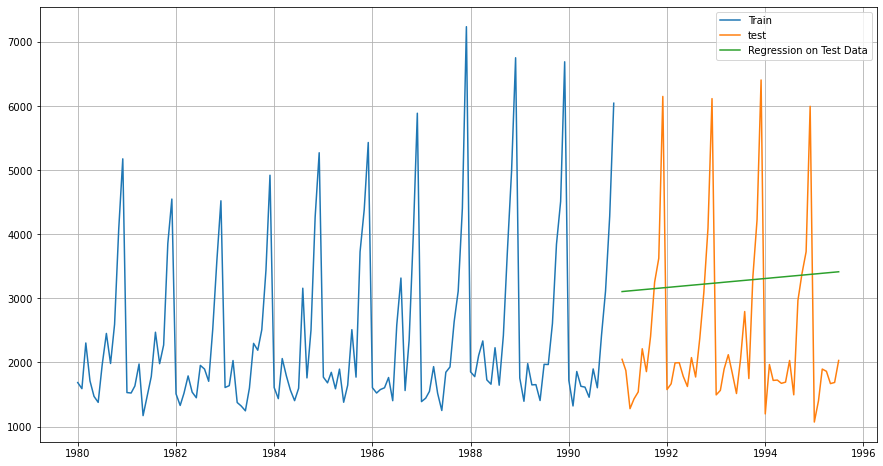

In [39]:
model_train=lr.predict(LR_1_train[['time']])
model_test=lr.predict(LR_1_test[['time']])
LR_1_test['RegOnTime']=model_test
plt.plot(LR_1_train['Sparkling'],label='Train')
plt.plot(LR_1_test['Sparkling'],label='test')
plt.plot(LR_1_test['RegOnTime'],label='Regression on Test Data')
plt.legend(loc='best')
plt.grid();

In [40]:
from sklearn import metrics

In [41]:
Rmse_LR=metrics.mean_squared_error(LR_1_test[['Sparkling']],model_test)
Rmse_LR

2382484.4376251427

In [42]:
result1_DF=pd.DataFrame({'RMSE':[Rmse_LR]},index=['Regression'])
result1_DF

,RMSE
Regression,2.382484e+06


In [43]:
Naive_train=train_df1.copy()
Naive_test=test_df1.copy()

In [44]:
Naive_train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [45]:
Naive_train[Naive_train.index=='1990-12-01']

,Sparkling
YearMonth,
1990-12-01,6047


In [46]:
Naive_test['Naive']=6047

In [47]:
Naive_test.head()

,Sparkling,Naive
YearMonth,,
1991-02-01,2049,6047
1991-03-01,1874,6047
1991-04-01,1279,6047
1991-05-01,1432,6047
1991-06-01,1540,6047


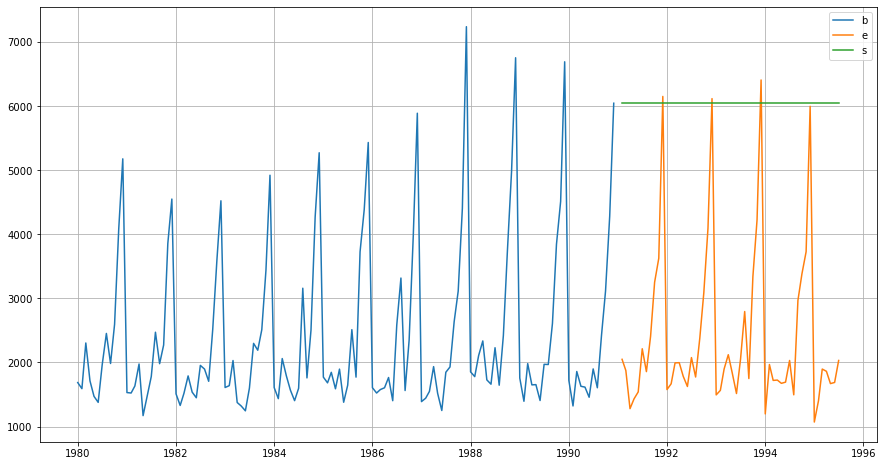

In [48]:
plt.plot(Naive_train['Sparkling'],label='Train')
plt.plot(Naive_test['Sparkling'],label='Test')
plt.plot(Naive_test['Naive'],label='Naive')
plt.legend('best')
plt.grid()

In [49]:
Rmse_Na=metrics.mean_squared_error(Naive_test['Sparkling'],Naive_test['Naive'])
Rmse_Na

14891018.425925925

In [50]:
result1_DF2=pd.DataFrame({'RMSE':[Rmse_Na]},index=['Naive'])
result1_DF2

,RMSE
Naive,1.489102e+07


In [51]:
result1_DF=pd.concat([result1_DF,result1_DF2])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07


In [52]:
SimAvg_train=train_df1.copy()
SimAvg_test=test_df1.copy()

In [53]:
Avg=SimAvg_train['Sparkling'].mean()
Avg

2403.780303030303

In [54]:
SimAvg_test['Avg']=Avg

In [55]:
SimAvg_train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


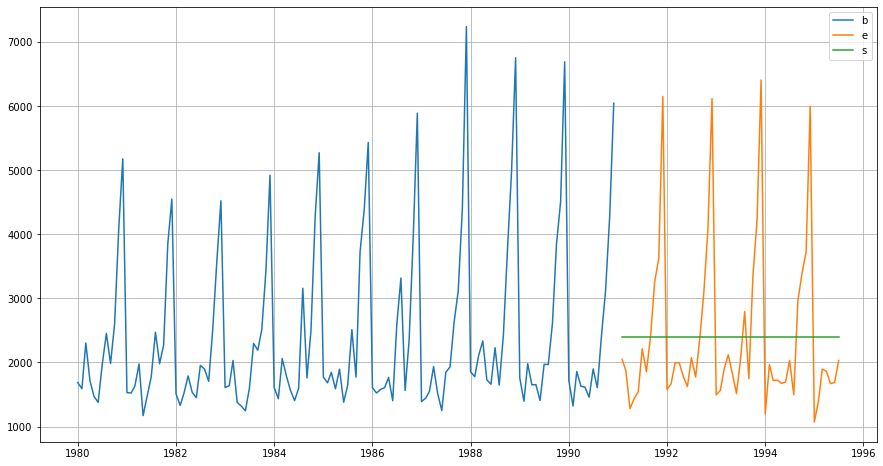

In [56]:
plt.plot(SimAvg_train['Sparkling'],label='Train')
plt.plot(SimAvg_test['Sparkling'],label='Test')
plt.plot(SimAvg_test['Avg'],label='Simple Average')
plt.legend('best')
plt.grid();

In [57]:
Rmse_Sim=metrics.mean_squared_error(SimAvg_test['Sparkling'],SimAvg_test['Avg'])
Rmse_Sim

1651278.978962606

In [58]:
result1_DF3=pd.DataFrame({'RMSE':[Rmse_Sim]},index=['Avg'])
result1_DF3

,RMSE
Avg,1.651279e+06


In [59]:
result1_DF=pd.concat([result1_DF,result1_DF3])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06


In [60]:
Mov_Avg=df1.copy()

In [61]:
Mov_Avg.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [62]:
Mov_Avg['Traailing2']=Mov_Avg['Sparkling'].rolling(2).mean()
Mov_Avg['Traailing4']=Mov_Avg['Sparkling'].rolling(4).mean()
Mov_Avg['Traailing6']=Mov_Avg['Sparkling'].rolling(6).mean()
Mov_Avg['Traailing8']=Mov_Avg['Sparkling'].rolling(8).mean()

In [63]:
Mov_Avg.head()

,Sparkling,Traailing2,Traailing4,Traailing6,Traailing8
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


In [64]:
Mov_Avg_train=Mov_Avg[Mov_Avg.index<'1991']
Mov_Avg_test=Mov_Avg[Mov_Avg.index>'1991']

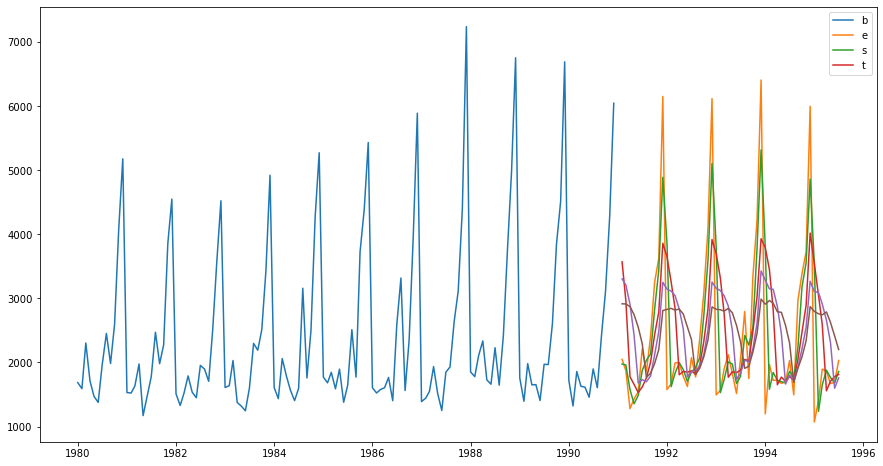

In [65]:
plt.plot(Mov_Avg_train['Sparkling'],label='Train')
plt.plot(Mov_Avg_test['Sparkling'],label='Test')
plt.plot(Mov_Avg_test['Traailing2'],label='Trailing2')
plt.plot(Mov_Avg_test['Traailing4'],label='Trailing4')
plt.plot(Mov_Avg_test['Traailing6'],label='Trailing6')
plt.plot(Mov_Avg_test['Traailing8'],label='Trailing8')
plt.legend('best')
plt.plot();

In [66]:
Rmse_MA1=metrics.mean_squared_error(Mov_Avg_test['Sparkling'],Mov_Avg_test['Traailing2'])
Rmse_MA2=metrics.mean_squared_error(Mov_Avg_test['Sparkling'],Mov_Avg_test['Traailing4'])
Rmse_MA3=metrics.mean_squared_error(Mov_Avg_test['Sparkling'],Mov_Avg_test['Traailing6'])
Rmse_MA4=metrics.mean_squared_error(Mov_Avg_test['Sparkling'],Mov_Avg_test['Traailing8'])

In [67]:
resultdf_MA=pd.DataFrame({'Model':['Rmse_MA1','Rmse_MA2','Rmse_MA3','Rmse_MA4'],'RMSE':[Rmse_MA1,Rmse_MA2,Rmse_MA3,Rmse_MA4]})
resultdf_MA

,Model,RMSE
0,Rmse_MA1,5.943311e+05
1,Rmse_MA2,1.293081e+06
2,Rmse_MA3,1.646338e+06
3,Rmse_MA4,1.819505e+06


In [68]:
resultdf_MA.index=resultdf_MA['Model']

In [69]:
resultdf_MA=resultdf_MA.drop('Model',axis=1)

In [70]:
resultdf_MA.head()

,RMSE
Model,
Rmse_MA1,5.943311e+05
Rmse_MA2,1.293081e+06
Rmse_MA3,1.646338e+06
Rmse_MA4,1.819505e+06


In [71]:
result1_DF=pd.concat([result1_DF,resultdf_MA[resultdf_MA.index=='Rmse_MA2']])

In [72]:
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06


In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
dftest = adfuller(df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


In [75]:
df1['Sparkling'].diff().dropna()

YearMonth
1980-02-01    -95.0
1980-03-01    713.0
1980-04-01   -592.0
1980-05-01   -241.0
1980-06-01    -94.0
              ...  
1995-03-01    495.0
1995-04-01    -35.0
1995-05-01   -192.0
1995-06-01     18.0
1995-07-01    343.0
Name: Sparkling, Length: 186, dtype: float64

In [76]:
dftest = adfuller(df1['Sparkling'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

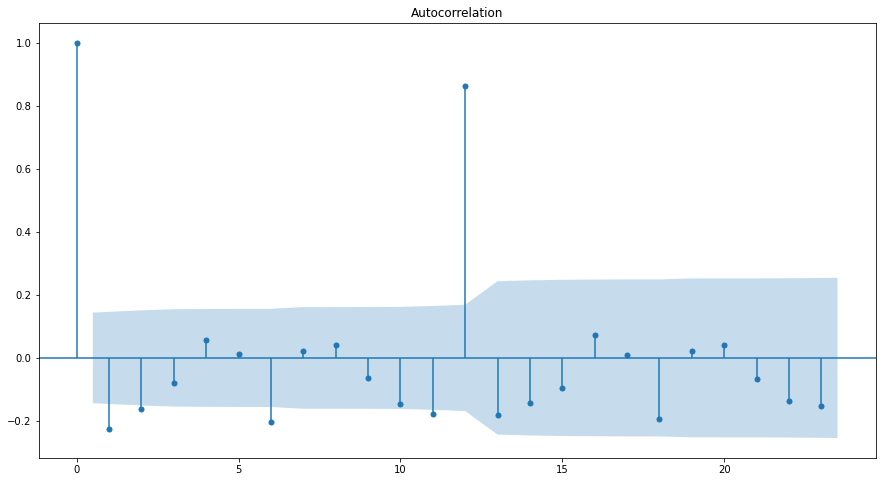

In [78]:
plot_acf(df1['Sparkling'].diff().dropna(),alpha=0.05);

C:\Users\John\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


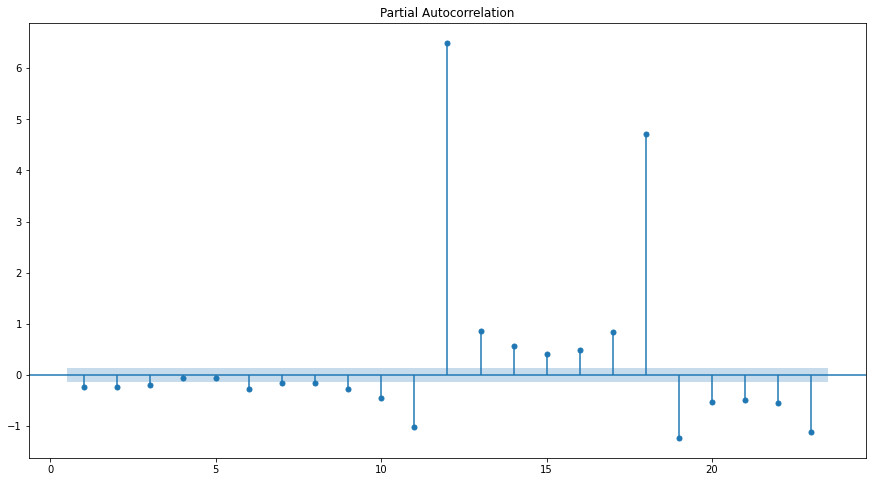

In [79]:
plot_pacf(df1['Sparkling'].diff().dropna(),zero=False,alpha=0.05);

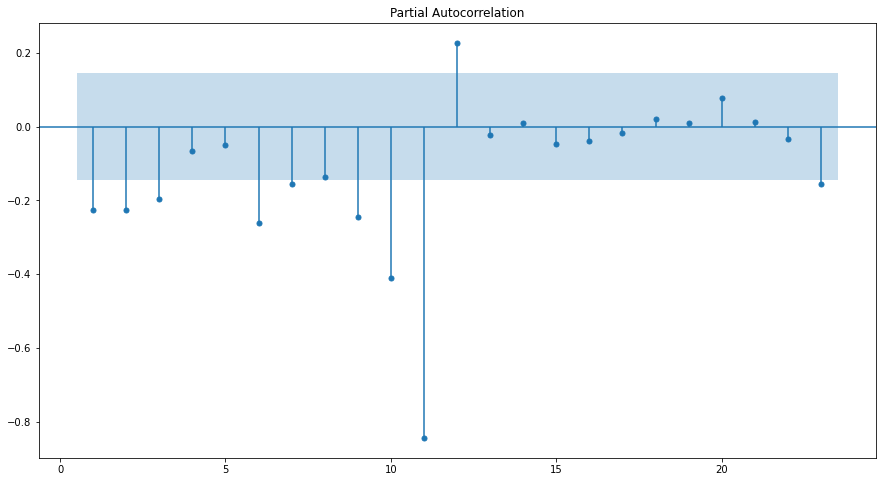

In [80]:
plot_pacf(df1['Sparkling'].diff().dropna(),zero=False,alpha=0.05,method='ywmle',);

In [81]:
AR_train=train_df1.copy()
AR_test=test_df1.copy()

In [82]:
dftest = adfuller(AR_train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


In [83]:
dftest = adfuller(AR_train['Sparkling'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


In [84]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [85]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [86]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(AR_train['Sparkling'].diff().dropna().values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2359.0493799749
ARIMA(0, 1, 1) - AIC:2257.658950309123
ARIMA(0, 1, 2) - AIC:2253.555026354479
ARIMA(1, 1, 0) - AIC:2328.4419743604276


C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2256.7785688495596
ARIMA(1, 1, 2) - AIC:2229.1859895476164
ARIMA(2, 1, 0) - AIC:2308.14804019211
ARIMA(2, 1, 1) - AIC:2250.75682396311
ARIMA(2, 1, 2) - AIC:2226.9371281860795


C:\Users\John\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(2, 1, 2)",2226.937128
5,"(1, 1, 2)",2229.185990
7,"(2, 1, 1)",2250.756824
2,"(0, 1, 2)",2253.555026
4,"(1, 1, 1)",2256.778569


In [88]:
auto_ARIMA = ARIMA(AR_train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 14 Aug 2022   AIC                           2213.509
Time:                        21:21:37   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

C:\Users\John\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


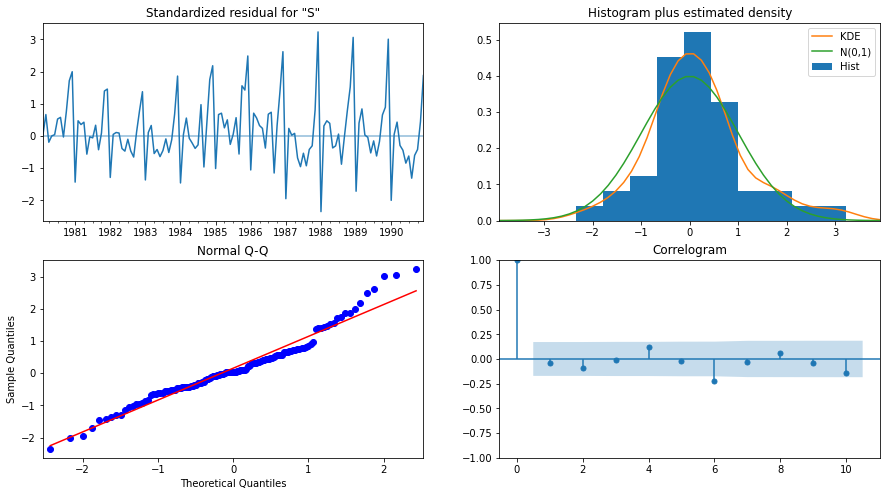

In [89]:
results_auto_ARIMA.plot_diagnostics();

In [90]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(AR_test))

In [91]:
Rmse_AR_auto=metrics.mean_squared_error(AR_test['Sparkling'],predicted_auto_ARIMA)
Rmse_AR_auto

1710275.9586580058

In [92]:
result1_DF4=pd.DataFrame({'RMSE':[Rmse_AR_auto]},index=['AR_auto'])
result1_DF4

,RMSE
AR_auto,1.710276e+06


In [93]:
result1_DF=pd.concat([result1_DF,result1_DF4])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06


In [94]:
manual_ARIMA = ARIMA(AR_train['Sparkling'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.476
Date:                Sun, 14 Aug 2022   AIC                           2230.952
Time:                        21:21:40   BIC                           2248.204
Sample:                    01-01-1980   HQIC                          2237.962
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4155      0.043     -9.746      0.000      -0.499      -0.332
ar.L2          0.3242      0.120      2.704      0.007       0.089       0.559
ar.L3         -0.2603      0.077     -3.362      0.0

C:\Users\John\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\John\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


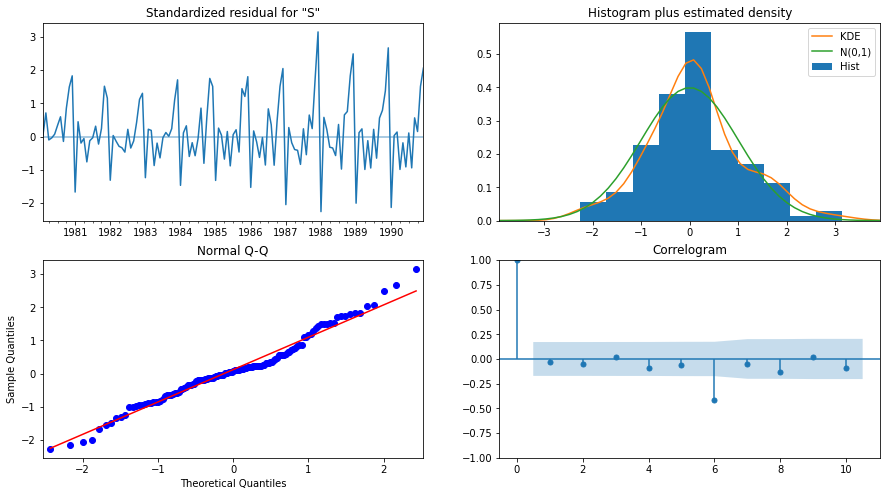

In [95]:
results_manual_ARIMA.plot_diagnostics();

In [96]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(AR_test))

In [97]:
Rmse_AR_manual=metrics.mean_squared_error(AR_test['Sparkling'],predicted_manual_ARIMA)
Rmse_AR_manual

1818229.8117205764

In [98]:
result1_DF5=pd.DataFrame({'RMSE':[Rmse_AR_manual]},index=['AR_manual'])
result1_DF5

,RMSE
AR_manual,1.818230e+06


In [99]:
result1_DF=pd.concat([result1_DF,result1_DF5])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06


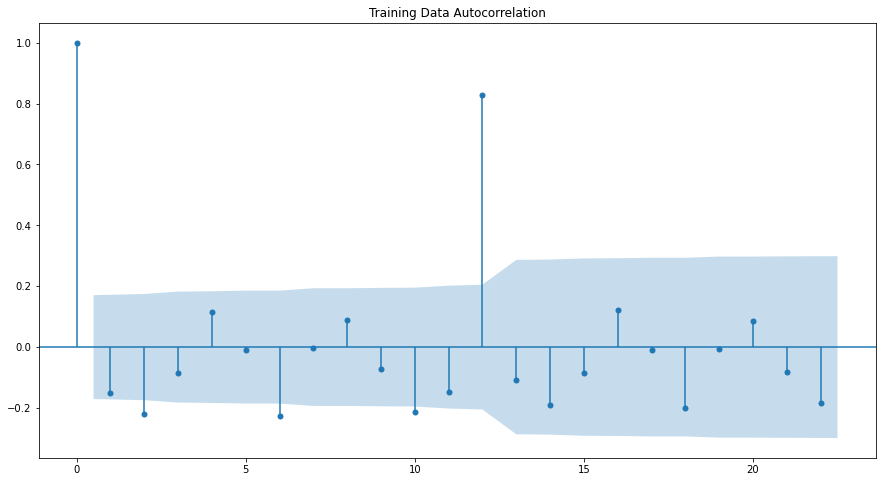

In [100]:
plot_acf(AR_train.diff(),title='Training Data Autocorrelation',missing='drop');

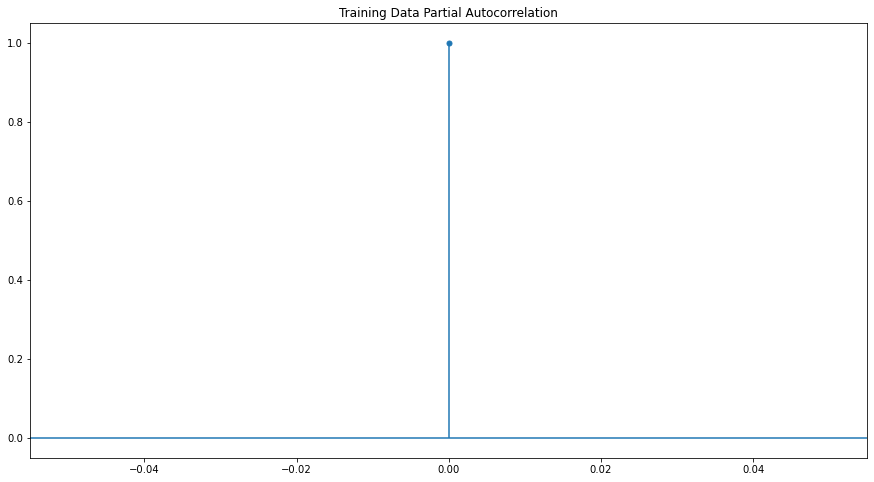

In [101]:
plot_pacf(AR_train.diff(),title='Training Data Partial Autocorrelation',method='ywmle');

In [102]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 4)
Model: (0, 1, 2)(0, 0, 2, 4)
Model: (0, 1, 3)(0, 0, 3, 4)
Model: (1, 1, 0)(1, 0, 0, 4)
Model: (1, 1, 1)(1, 0, 1, 4)
Model: (1, 1, 2)(1, 0, 2, 4)
Model: (1, 1, 3)(1, 0, 3, 4)
Model: (2, 1, 0)(2, 0, 0, 4)
Model: (2, 1, 1)(2, 0, 1, 4)
Model: (2, 1, 2)(2, 0, 2, 4)
Model: (2, 1, 3)(2, 0, 3, 4)
Model: (3, 1, 0)(3, 0, 0, 4)
Model: (3, 1, 1)(3, 0, 1, 4)
Model: (3, 1, 2)(3, 0, 2, 4)
Model: (3, 1, 3)(3, 0, 3, 4)


In [103]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [104]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(AR_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 4) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 4) - AIC:2185.7939935631935
SARIMA(0, 1, 0)x(0, 0, 2, 4) - AIC:2088.42763473408
SARIMA(0, 1, 0)x(0, 0, 3, 4) - AIC:1959.5422324270808
SARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:2202.19571994411
SARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:2154.189654301146
SARIMA(0, 1, 0)x(1, 0, 2, 4) - AIC:2027.8958796990905
SARIMA(0, 1, 0)x(1, 0, 3, 4) - AIC:1958.5224764981588
SARIMA(0, 1, 0)x(2, 0, 0, 4) - AIC:2137.78745529835
SARIMA(0, 1, 0)x(2, 0, 1, 4) - AIC:2094.3859546835024
SARIMA(0, 1, 0)x(2, 0, 2, 4) - AIC:2025.6386629604428
SARIMA(0, 1, 0)x(2, 0, 3, 4) - AIC:1929.1159284421549
SARIMA(0, 1, 0)x(3, 0, 0, 4) - AIC:1840.8333361960126
SARIMA(0, 1, 0)x(3, 0, 1, 4) - AIC:1842.7655681782207
SARIMA(0, 1, 0)x(3, 0, 2, 4) - AIC:1840.846905620402
SARIMA(0, 1, 0)x(3, 0, 3, 4) - AIC:1803.337477158592
SARIMA(0, 1, 1)x(0, 0, 0, 4) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 4) - AIC:2166.483551978705
SARIMA(0, 1, 1)x(0, 0, 2, 4) - AIC:204

SARIMA(2, 1, 1)x(2, 0, 1, 4) - AIC:2026.5350120575215
SARIMA(2, 1, 1)x(2, 0, 2, 4) - AIC:1989.310432169771
SARIMA(2, 1, 1)x(2, 0, 3, 4) - AIC:1830.44394723834
SARIMA(2, 1, 1)x(3, 0, 0, 4) - AIC:1762.876094558316
SARIMA(2, 1, 1)x(3, 0, 1, 4) - AIC:1798.1328714483432
SARIMA(2, 1, 1)x(3, 0, 2, 4) - AIC:1766.1447200397547
SARIMA(2, 1, 1)x(3, 0, 3, 4) - AIC:1756.9244968721093
SARIMA(2, 1, 2)x(0, 0, 0, 4) - AIC:2176.8681149359595
SARIMA(2, 1, 2)x(0, 0, 1, 4) - AIC:2103.7372705429966
SARIMA(2, 1, 2)x(0, 0, 2, 4) - AIC:2012.1347892349843
SARIMA(2, 1, 2)x(0, 0, 3, 4) - AIC:1893.8983264587341
SARIMA(2, 1, 2)x(1, 0, 0, 4) - AIC:2128.866195837979
SARIMA(2, 1, 2)x(1, 0, 1, 4) - AIC:2074.7052531243876
SARIMA(2, 1, 2)x(1, 0, 2, 4) - AIC:1968.430802055179
SARIMA(2, 1, 2)x(1, 0, 3, 4) - AIC:1893.0949440018755
SARIMA(2, 1, 2)x(2, 0, 0, 4) - AIC:2074.5770710775
SARIMA(2, 1, 2)x(2, 0, 1, 4) - AIC:2051.655908118459
SARIMA(2, 1, 2)x(2, 0, 2, 4) - AIC:1974.4956792273051
SARIMA(2, 1, 2)x(2, 0, 3, 4) - AIC:189

In [105]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
191,"(2, 1, 3)","(3, 0, 3, 4)",1708.967809
255,"(3, 1, 3)","(3, 0, 3, 4)",1709.385118
63,"(0, 1, 3)","(3, 0, 3, 4)",1710.552848
127,"(1, 1, 3)","(3, 0, 3, 4)",1711.500938
111,"(1, 1, 2)","(3, 0, 3, 4)",1724.073588


In [106]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(AR_train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(3, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(3, 0, 3, 4)   Log Likelihood                -842.484
Date:                           Sun, 14 Aug 2022   AIC                           1708.968
Time:                                   21:28:16   BIC                           1741.907
Sample:                               01-01-1980   HQIC                          1722.338
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1895      0.030    -39.018      0.000      -1.249      -1.130
ar.L2         -0.9495      0.046    -20.667

In [107]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(AR_test))

In [108]:
Rmse_SAR_auto=metrics.mean_squared_error(AR_test['Sparkling'],predicted_auto_SARIMA)
Rmse_SAR_auto

3122672.969418202

In [109]:
result1_DF5=pd.DataFrame({'RMSE':[Rmse_SAR_auto]},index=['SAR_auto'])
result1_DF5

,RMSE
SAR_auto,3.122673e+06


In [110]:
result1_DF=pd.concat([result1_DF,result1_DF5])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06
SAR_auto,3.122673e+06


In [111]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(AR_train['Sparkling'],
                                order=(2,1,3),
                                seasonal_order=(0, 0, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1079.520
Date:                Sun, 14 Aug 2022   AIC                           2171.040
Time:                        21:28:17   BIC                           2188.105
Sample:                    01-01-1980   HQIC                          2177.973
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1163      1.109     -0.105      0.916      -2.289       2.057
ar.L2         -0.1801      0.474     -0.380      0.704      -1.109       0.749
ma.L1         -0.3581      1.078     -0.332      0.7

In [112]:
predicted_manual_SARIMA = results_auto_SARIMA.forecast(steps=len(AR_test))

In [113]:
Rmse_SAR_manual=metrics.mean_squared_error(AR_test['Sparkling'],predicted_manual_SARIMA)
Rmse_SAR_manual

3122672.969418202

In [114]:
result1_DF6=pd.DataFrame({'RMSE':[Rmse_SAR_manual]},index=['SAR_manual'])
result1_DF6

,RMSE
SAR_manual,3.122673e+06


In [115]:
result1_DF=pd.concat([result1_DF,result1_DF6])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06
SAR_auto,3.122673e+06
SAR_manual,3.122673e+06


In [116]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [117]:
model_SES = SimpleExpSmoothing(train_df1,initialization_method='estimated')

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [118]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [119]:
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [120]:
SES_predict = model_SES_autofit.forecast(steps=len(test_df1))
SES_predict

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

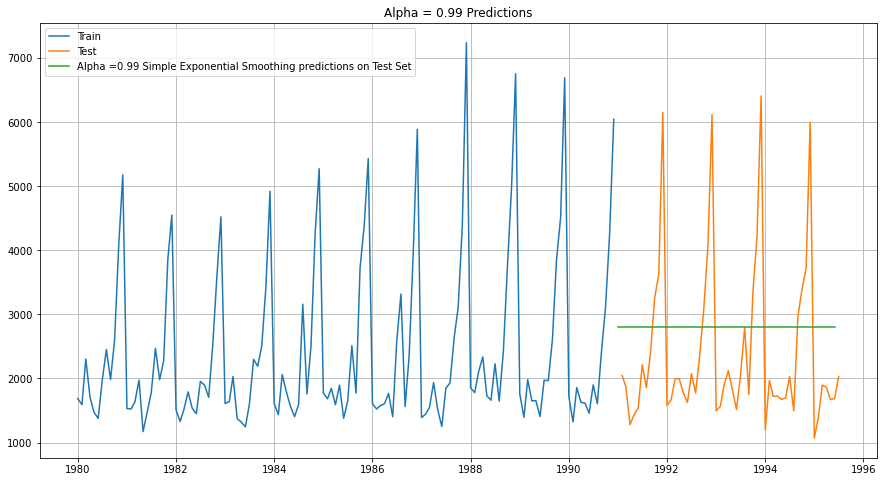

In [121]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [122]:
print('SES RMSE:',mean_squared_error(test_df1.values,SES_predict.values,squared=False))

SES RMSE: 1344.7416911131227


In [123]:
result1_DF7 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,SES_predict.values)[0]]},index=['EXP1'])
result1_DF7

,RMSE
EXP1,1344.741691


In [124]:
result1_DF=pd.concat([result1_DF,result1_DF7])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06
SAR_auto,3.122673e+06
SAR_manual,3.122673e+06
EXP1,1.344742e+03


In [125]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train_df1,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [126]:
DES_predict =  model_DES.forecast(len(test_df1))
DES_predict

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

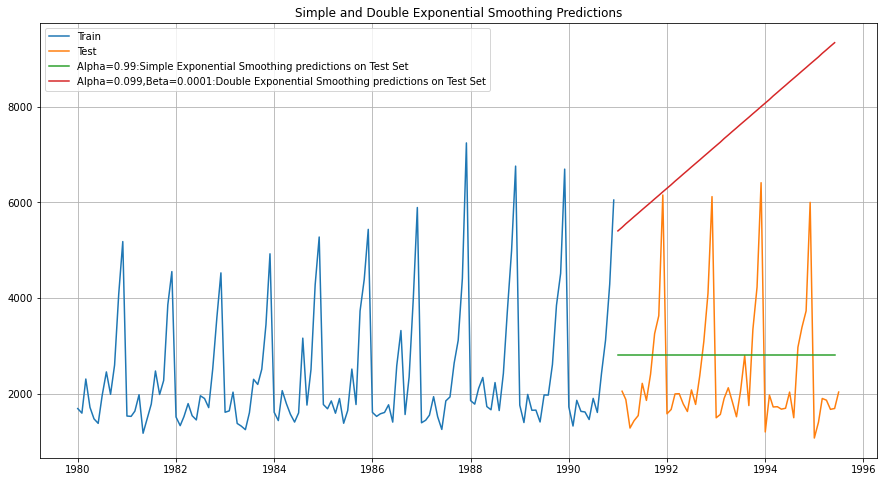

In [127]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [128]:
result1_DF8 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,DES_predict.values)[0]]},index=['EXP2'])
result1_DF8

,RMSE
EXP2,3257.543389


In [129]:
result1_DF=pd.concat([result1_DF,result1_DF8])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06
SAR_auto,3.122673e+06
SAR_manual,3.122673e+06
EXP1,1.344742e+03
EXP2,3.257543e+03


In [130]:
model_TES = ExponentialSmoothing(train_df1,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [131]:
TES_predict =  model_TES.forecast(len(test_df1))
TES_predict

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    1467.683944
1994-02-01    1181.806206
1994-03-01  

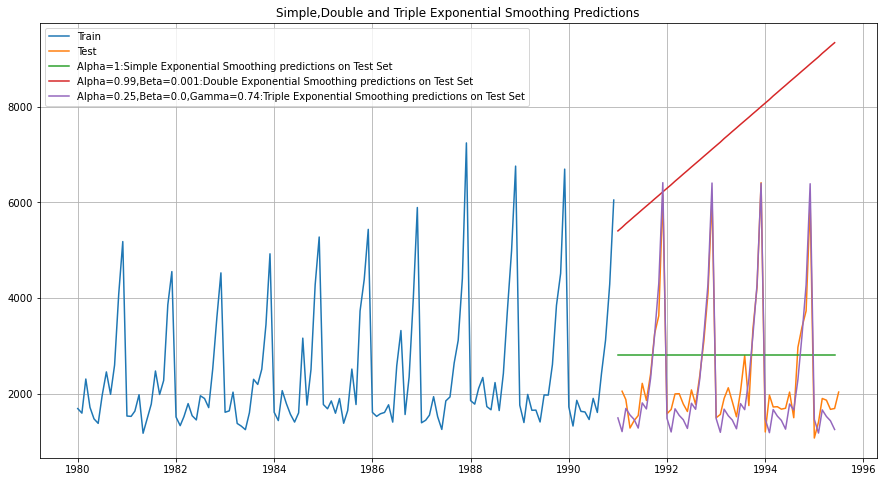

In [132]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [133]:
result1_DF9 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,TES_predict.values)[0]]},index=['TES'])
result1_DF9

,RMSE
TES,1579.204982


In [134]:
result1_DF=pd.concat([result1_DF,result1_DF9])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06
SAR_auto,3.122673e+06
SAR_manual,3.122673e+06
EXP1,1.344742e+03
EXP2,3.257543e+03


In [135]:
model_TES_am = ExponentialSmoothing(train_df1,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [136]:
TES_predict_am =  model_TES_am.forecast(len(test_df1))
TES_predict_am

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
1991-06-01    1355.102435
1991-07-01    1854.197719
1991-08-01    1820.513188
1991-09-01    2276.971718
1991-10-01    3122.024202
1991-11-01    4128.528561
1991-12-01    5890.064588
1992-01-01    1538.233708
1992-02-01    1314.193684
1992-03-01    1707.937498
1992-04-01    1604.369388
1992-05-01    1493.650618
1992-06-01    1312.499576
1992-07-01    1795.750753
1992-08-01    1762.976871
1992-09-01    2204.819253
1992-10-01    3022.831861
1992-11-01    3997.009544
1992-12-01    5701.930382
1993-01-01    1488.969948
1993-02-01    1271.992443
1993-03-01    1652.945240
1993-04-01    1552.572843
1993-05-01    1445.298507
1993-06-01    1269.896716
1993-07-01    1737.303788
1993-08-01    1705.440555
1993-09-01    2132.666788
1993-10-01    2923.639519
1993-11-01    3865.490526
1993-12-01    5513.796176
1994-01-01    1439.706189
1994-02-01    1229.791202
1994-03-01  

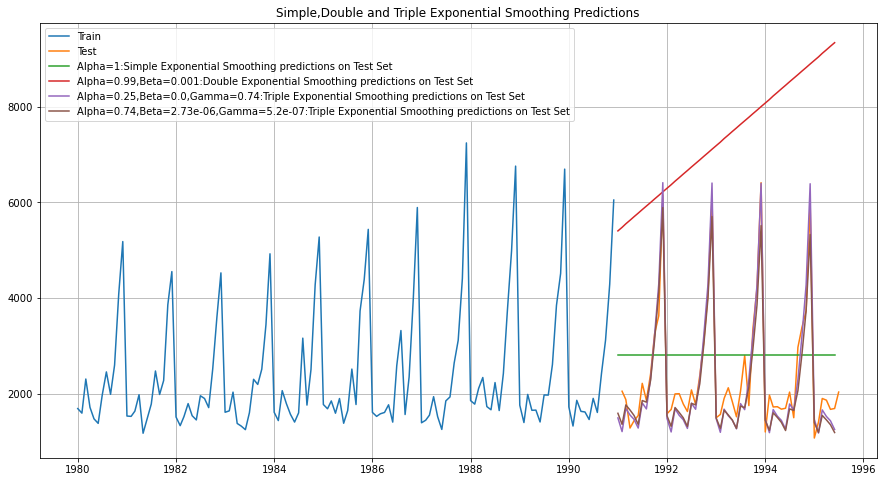

In [137]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [138]:
result1_DF10 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,TES_predict_am.values)[0]]},index=['TES_am'])
result1_DF10

,RMSE
TES_am,1524.814743


In [139]:
result1_DF=pd.concat([result1_DF,result1_DF10])
result1_DF

,RMSE
Regression,2.382484e+06
Naive,1.489102e+07
Avg,1.651279e+06
Rmse_MA2,1.293081e+06
AR_auto,1.710276e+06
AR_manual,1.818230e+06
SAR_auto,3.122673e+06
SAR_manual,3.122673e+06
EXP1,1.344742e+03
EXP2,3.257543e+03


In [142]:
SES_predict_1 = model_SES_autofit.forecast(steps=12)
SES_predict_1

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
Freq: MS, dtype: float64

In [150]:
result1_DF12 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,SES_predict_1.values)[0]]},index=['Single'])
result1_DF12

,RMSE
Single,1344.741691


In [149]:
TES_predict_1 =  model_TES.forecast(steps=12)
TES_predict_1
result1_DF13 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,TES_predict_1.values)[0]]},index=['TES'])
result1_DF13

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,RMSE
TES,1579.204982


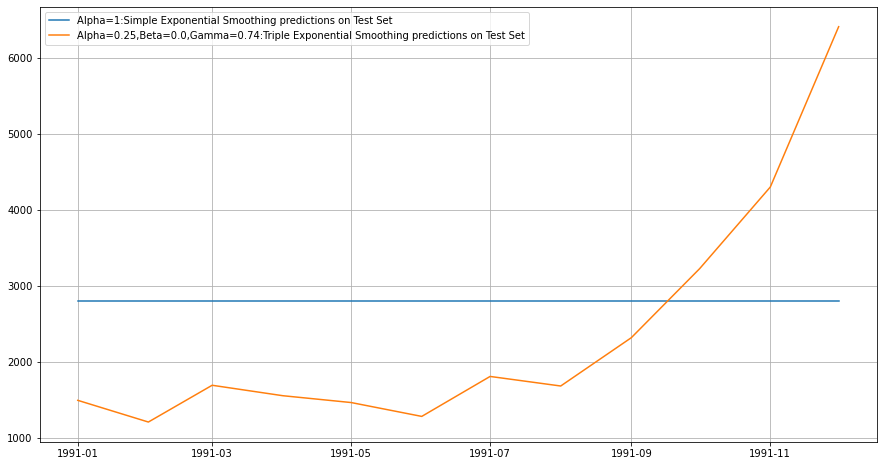

In [152]:
plt.plot(SES_predict_1, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_1, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()